# t-SNE representation of +ve and -ve review of amazon product
# TFIDF 
Now instead of BOW we will use TFIDF score to plot reviews of 4k+4k data

In [1]:
from sklearn.manifold import TSNE
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

con = sqlite3.connect('clean_data.sqlite') 
clean_data = pd.read_sql_query("""SELECT * FROM Reviews1 WHERE Score != 3""", con) 

In [2]:
#with 2 gram its taking a lot of time so trying with 1gram
#tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(clean_data['CleanedText'].values)
x = pd.DataFrame(final_tf_idf.toarray())

print(x.shape)


(4000, 8625)


In [3]:
clean_data['CleanedText'].sample(5)

1398    b'certain top qualiti match even real matcha s...
2375    b'bought larg popcorn machin children guest hi...
2731    b'cant realli say much spell suprem incorrect ...
2772    b'although normal love green mountain coffe pa...
2252    b'weve love carbon drink gone midst real addic...
Name: CleanedText, dtype: object

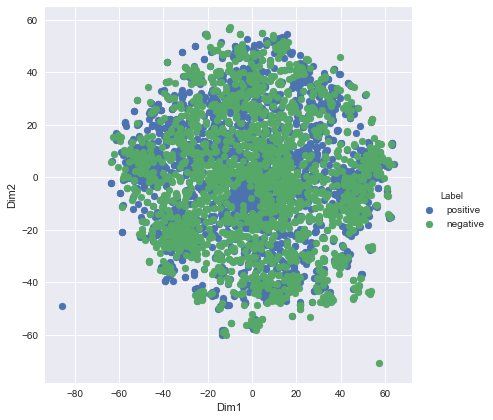

In [5]:
#x=final_tf_idf.toarray()
y=clean_data['Score']
model=TSNE(n_components=2,random_state=0) #,perplexity=10,n_iter=250)
tsne_data=model.fit_transform(x)
#create new data for plotting
tsne_data=np.vstack((tsne_data.T,y)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dim1','Dim2','Label'))
sns.FacetGrid(tsne_df,hue='Label',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.show()